## Analise sobre o custo médico para curar doenças causadas pelo tabagismo

Este conjunto de dados fornece uma visão sobre vários fatores associados ao custo médico para curar doenças causadas pelo tabagismo.

Colunas no dataset:

- **age**: idade do beneficiário principal

- **sex**: gênero do contratante de seguros

- **bmi**: índice de massa corporal, fornecendo uma compreensão do corpo e idealmente entre 18,5 a 24,9

- **children**: número de filhos cobertos por seguro saúde / Número de dependentes

- **smoker**: se a pessoa fuma ou não

- **region**: a área residencial do beneficiário nos EUA

- **medical charges**: custos médicos individuais cobrados pelo seguro de saúde

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [2]:
db = pd.read_csv('dataset_.csv', index_col=None)


In [3]:
# Verificando informações

db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              1338 non-null   int64  
 1   sex              1338 non-null   object 
 2   bmi              1338 non-null   float64
 3   children         1338 non-null   int64  
 4   smoker           1338 non-null   object 
 5   region           1338 non-null   object 
 6   medical charges  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
db.head(10)

,age,sex,bmi,children,smoker,region,medical charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [45]:
db.describe()

,age,bmi,children,medical charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
# Verificando valores nulos.

db.isnull().sum().sort_values(ascending=False).head(20)

age                0
sex                0
bmi                0
children           0
smoker             0
region             0
medical charges    0
dtype: int64

In [7]:
# Número total de linhas duplicadas.

db.duplicated().sum()

np.int64(1)

In [8]:
db[db.duplicated()]

,age,sex,bmi,children,smoker,region,medical charges
581,19,male,30.59,0,no,northwest,1639.5631


In [9]:
db[db['medical charges']==1639.5631]

,age,sex,bmi,children,smoker,region,medical charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [10]:
index_to_remove = db[db['medical charges'] == 1639.5631].head(1).index
db.drop(index_to_remove, inplace=True)

In [11]:
# Verificando valores únicos em cada coluna.

db.nunique()

age                  47
sex                   2
bmi                 548
children              6
smoker                2
region                4
medical charges    1337
dtype: int64

In [32]:
variaveis_numericas = []
for i in db.columns[0:11].tolist():
        if db.dtypes[i] == 'int64' or db.dtypes[i] == 'float64':                        
            variaveis_numericas.append(i)  

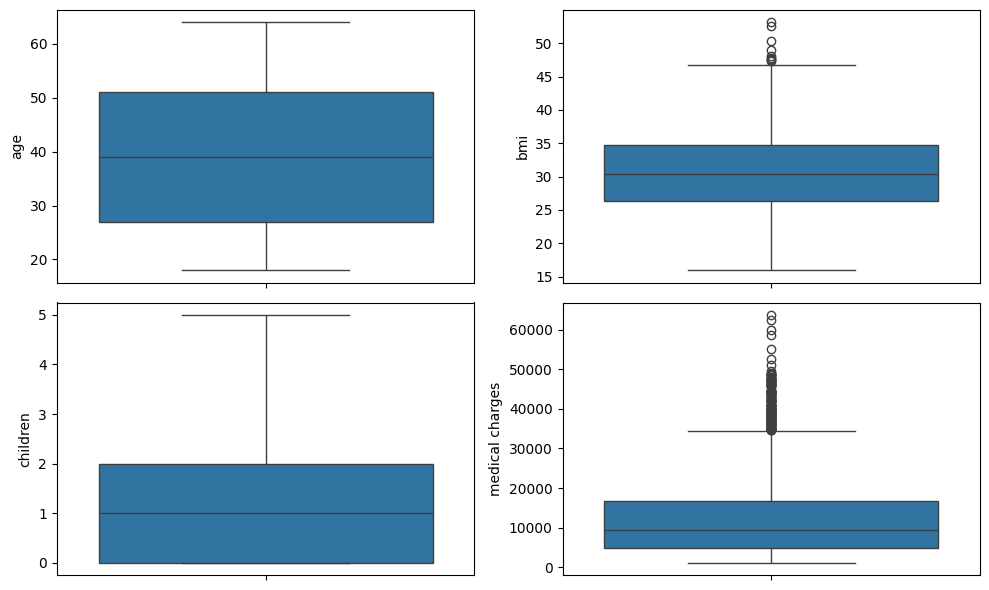

In [33]:
# Possíveis outliers.

plt.rcParams["figure.figsize"] = [10,6]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.boxplot(data = db, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0            

plt.show()

# Visualização dos dados

## Correlação entre Variáveis
- **Idade e Gastos Médicos**: Existe uma correlação positiva moderada, indicando que, em geral, à medida que a idade aumenta, os custos médicos também tendem a aumentar.

- **Sexo e Gastos Médicos**: Correlação muito fraca negativa, indicando pouca ou nenhuma relação direta entre os dois.

- **IMC (BMI) e Gastos Médicos**: A correlação positiva fraca sugere que o índice de massa corporal tem um impacto leve nos custos médicos.

- **Número de Filhos e Gastos Médicos**: A correlação entre o número de filhos e os gastos médicos é muito fraca, indicando que o número de dependentes tem pouco impacto nos custos médicos.

- **Fumante e Gastos Médicos**: A correlação mais forte e positiva, sugere que o status de fumante está fortemente associado a maiores despesas médicas, refletindo a influência significativa do tabagismo nos custos com saúde.

- **Região e Gastos Médicos**: Uma correlação muito fraca com os custos médicos, indicando que não é um fator significativo para explicar variações nos custos.

In [12]:
# Transformando os valores de tipo object em inteiros de forma temporária para facilitar a criação da matriz de confusão.

db_temp = db.copy()

db_temp['smoker'] = db_temp['smoker'].map({'yes': 1, 'no': 0})
db_temp['region'] = db_temp['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})
db_temp['sex'] = db_temp['sex'].map({'male': 0, 'female': 1})

correlation_matrix = db_temp.corr()

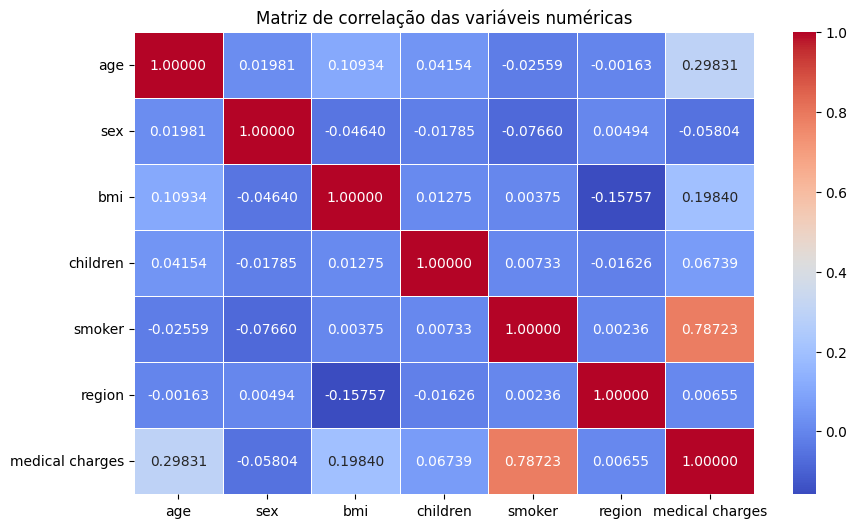

In [13]:
# Abaixo a matriz de correlação entre as variáveis.

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.5f', linewidths=0.5)
plt.title('Matriz de correlação das variáveis numéricas')
plt.show()

## Distribuição de idades

A amostra é diversificada em termos de idade, com uma média de aproximadamente 39 anos dos pacientes e uma concentração maior em adultos jovens entre 18 e 19 anos.

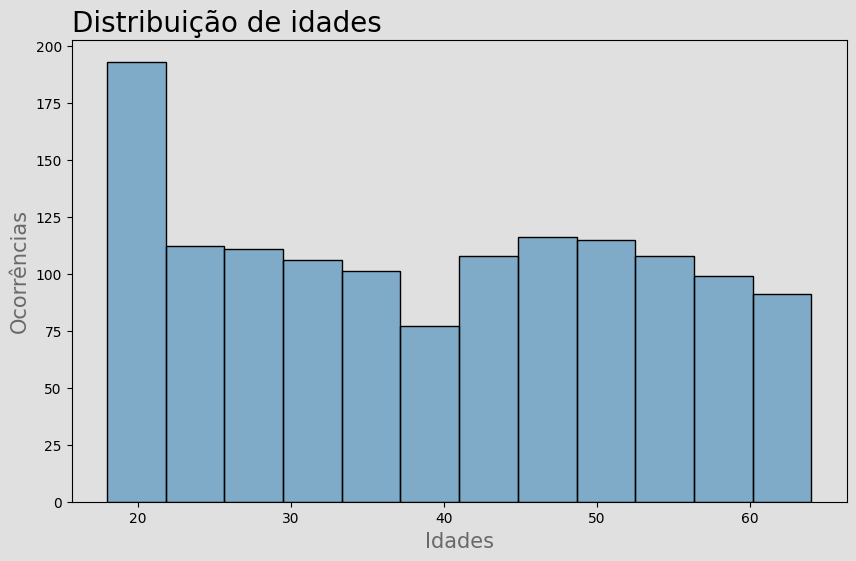

In [14]:
plt.figure(figsize=(10, 6))

sns.histplot(
    data=db,
    x='age',
    multiple='stack',
    alpha=0.5,  
    kde=False
)

plt.title('Distribuição de idades', fontsize=20, loc='left')
plt.xlabel('Idades', fontsize=15, color='#696969')
plt.ylabel('Ocorrências', fontsize=15, color='#696969')

plt.gca().set_facecolor('#E0E0E0')
plt.gcf().set_facecolor('#E0E0E0')

plt.show()

## IMC dos pacientes (BMI)

No gráfico abaixo mostra a variação do IMC dos pacientes.

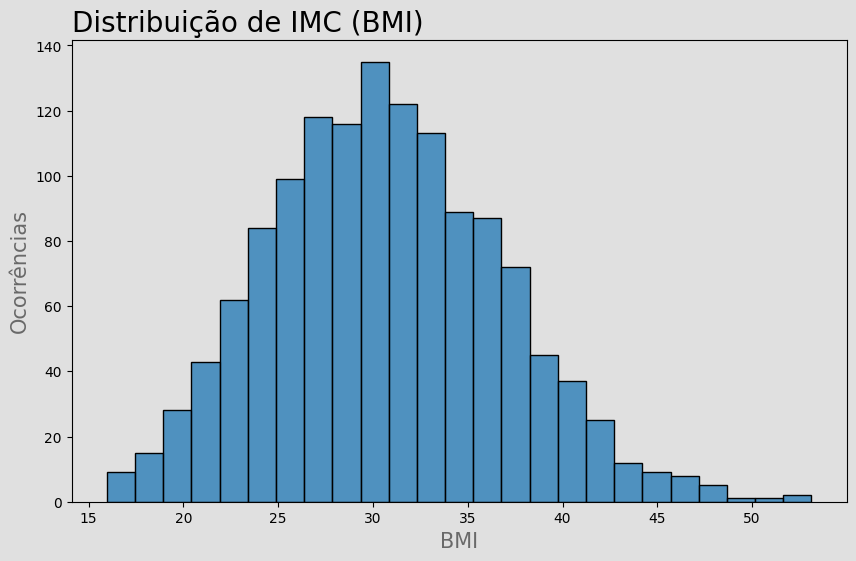

In [15]:
plt.figure(figsize=(10, 6))

sns.histplot(data=db, x="bmi")

plt.title('Distribuição de IMC (BMI)', fontsize=20, loc='left')
plt.xlabel('BMI', fontsize=15, color='#696969')
plt.ylabel('Ocorrências', fontsize=15, color='#696969')

plt.gca().set_facecolor('#E0E0E0')
plt.gcf().set_facecolor('#E0E0E0')

plt.show()

## Gastos médicos

Os gastos médicos variam amplamente, com a maioria dos casos situados entre 2.000 e 14.000 dólares.

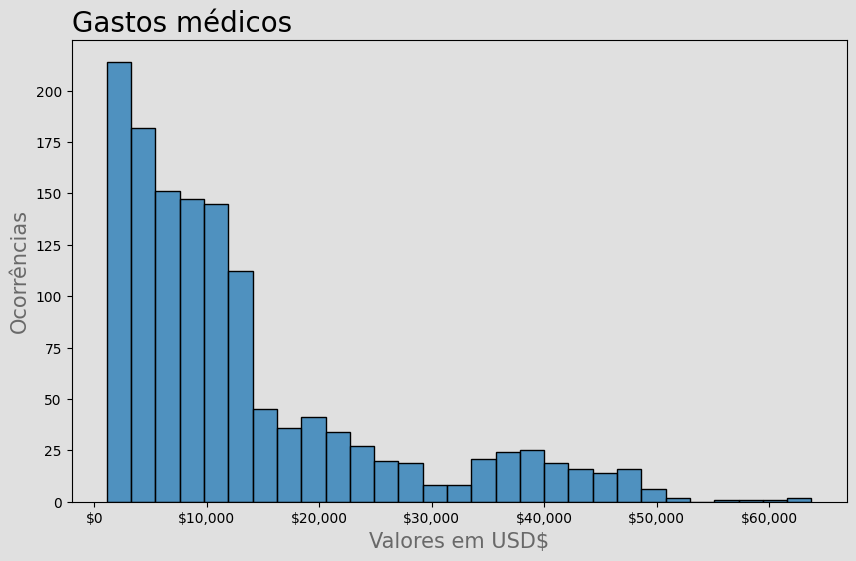

In [16]:
plt.figure(figsize=(10, 6))

sns.histplot(data=db, x="medical charges")

plt.title('Gastos médicos', fontsize=20, loc='left')
plt.xlabel('Valores em USD$', fontsize=15, color='#696969')
plt.ylabel('Ocorrências', fontsize=15, color='#696969')

plt.gca().set_facecolor('#E0E0E0')
plt.gcf().set_facecolor('#E0E0E0')

plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

plt.show()

## Distribuição de Masculino e Feminino

A distribuição entre homens e mulheres é equilibrada, com uma ligeira predominância masculina nos dados.

In [39]:
db.groupby(['sex']).size()

sex
female    662
male      675
dtype: int64

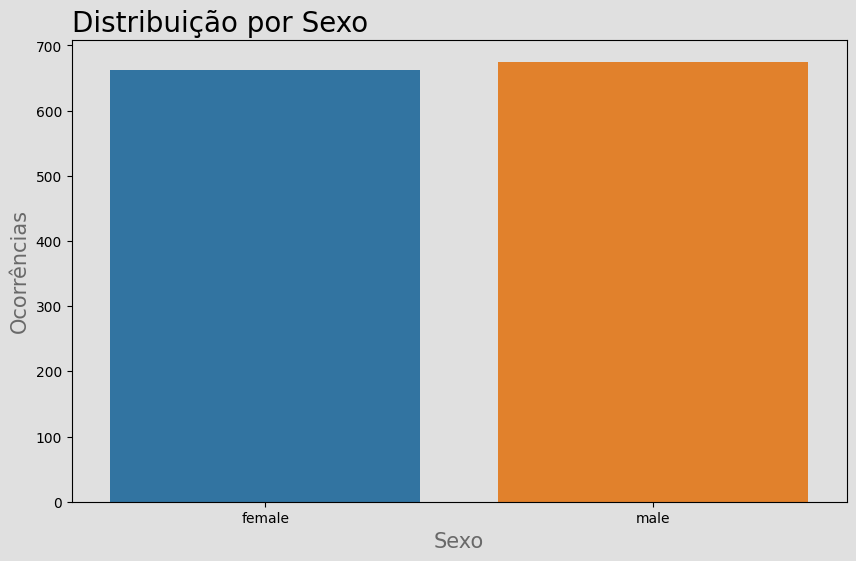

In [17]:
plt.figure(figsize=(10, 6))

sns.countplot(data=db, x="sex", hue="sex")

plt.title('Distribuição por Sexo', fontsize=20, loc='left')
plt.xlabel('Sexo', fontsize=15, color='#696969')
plt.ylabel('Ocorrências', fontsize=15, color='#696969')

plt.gca().set_facecolor('#E0E0E0')
plt.gcf().set_facecolor('#E0E0E0')

plt.show()

## Número de Filhos

A maioria dos indivíduos possui um ou não possui filhos e outros chegam a ter cinco filhos, mesmo não tendo uma correlação forte com os custos médicos, ainda sim é importante ter uma noção da quantidade de possíveis dependentes do seguro de saúde.

In [40]:
db.groupby(['children']).size()

children
0    573
1    324
2    240
3    157
4     25
5     18
dtype: int64

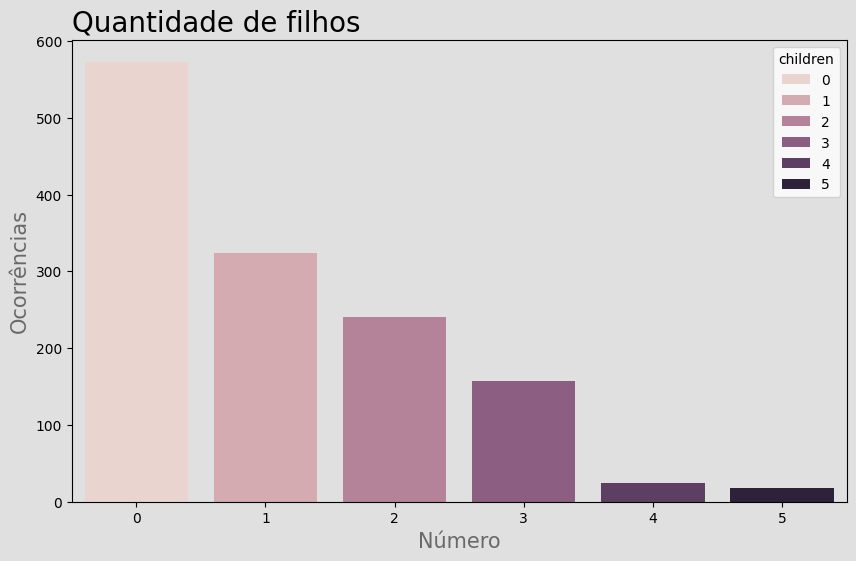

In [18]:
plt.figure(figsize=(10, 6))

sns.countplot(data=db, x="children", hue="children")

plt.title('Quantidade de filhos', fontsize=20, loc='left')
plt.xlabel('Número', fontsize=15, color='#696969')
plt.ylabel('Ocorrências', fontsize=15, color='#696969')

plt.gca().set_facecolor('#E0E0E0')
plt.gcf().set_facecolor('#E0E0E0')

plt.show()

## Fumantes

A maioria dos indivíduos são não fumantes, porém, os fumantes representam um grupo importante com gastos médicos mais altos.

In [41]:
db.groupby(['smoker']).size()

smoker
no     1063
yes     274
dtype: int64

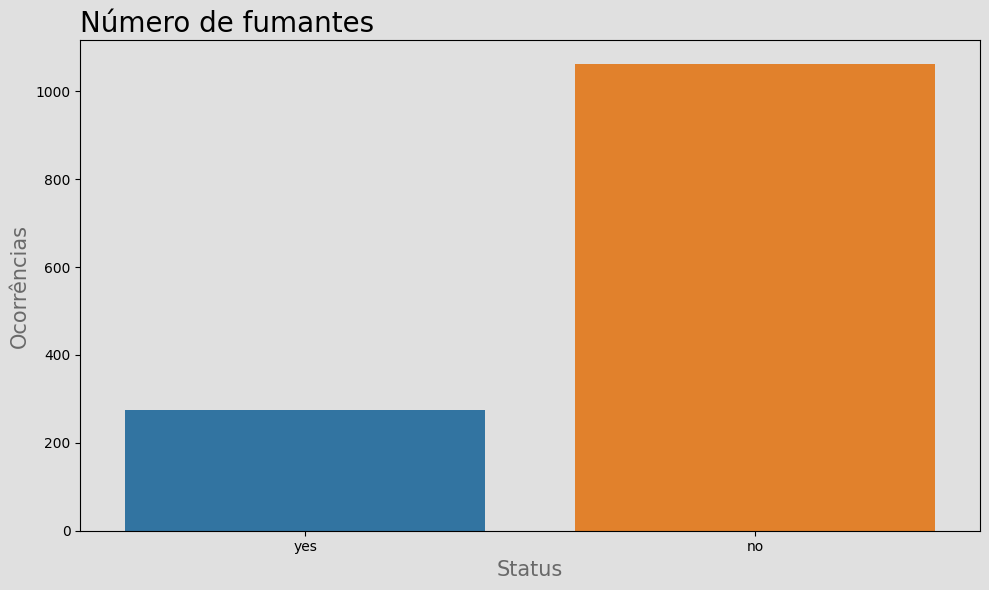

In [29]:
plt.figure(figsize=(10, 6))

sns.countplot(data=db, x="smoker", hue="smoker")

plt.title('Número de fumantes', fontsize=20, loc='left')
plt.xlabel('Status', fontsize=15, color='#696969')
plt.ylabel('Ocorrências', fontsize=15, color='#696969')

plt.gca().set_facecolor('#E0E0E0')
plt.gcf().set_facecolor('#E0E0E0')

plt.show()





## Regiões

A distribuição regional é bastante uniforme, com o sudeste dos EUA apresentando o maior número de ocorrências, enquanto as outras três estão bem equilibradas.

In [42]:
db.groupby(['region']).size()

region
northeast    324
northwest    324
southeast    364
southwest    325
dtype: int64

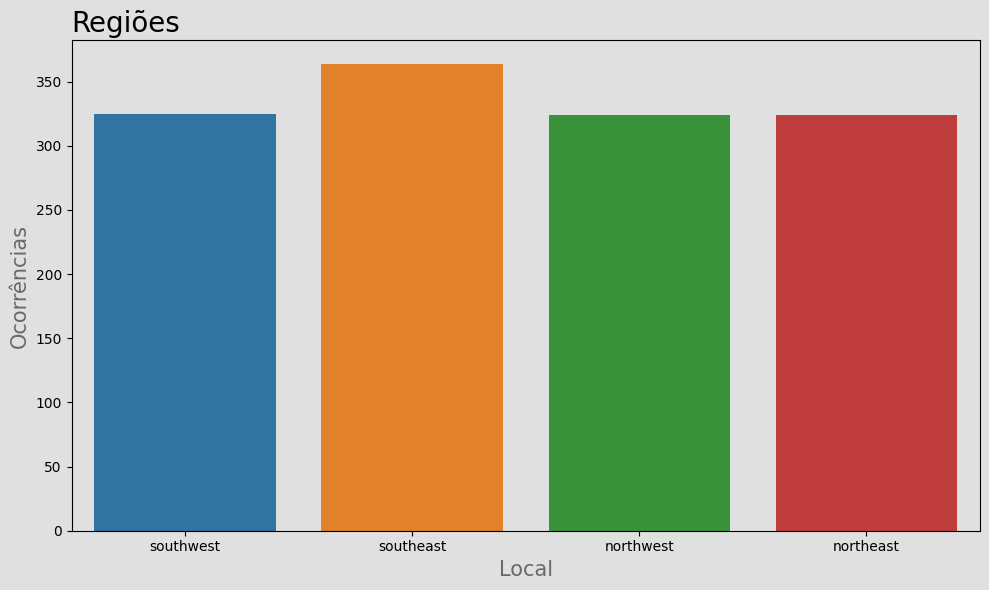

In [31]:
plt.figure(figsize=(10, 6))

sns.countplot(data=db, x="region", hue="region")

plt.title('Regiões', fontsize=20, loc='left')
plt.xlabel('Local', fontsize=15, color='#696969')
plt.ylabel('Ocorrências', fontsize=15, color='#696969')

plt.gca().set_facecolor('#E0E0E0')
plt.gcf().set_facecolor('#E0E0E0')

plt.show()

# Comparações entre as colunas

## Gastos médicos X Fumantes

É perceptivel que os gastos relacionados a saúde para fumantes são maiores e aparecem com mais frequência em valores mais altos.

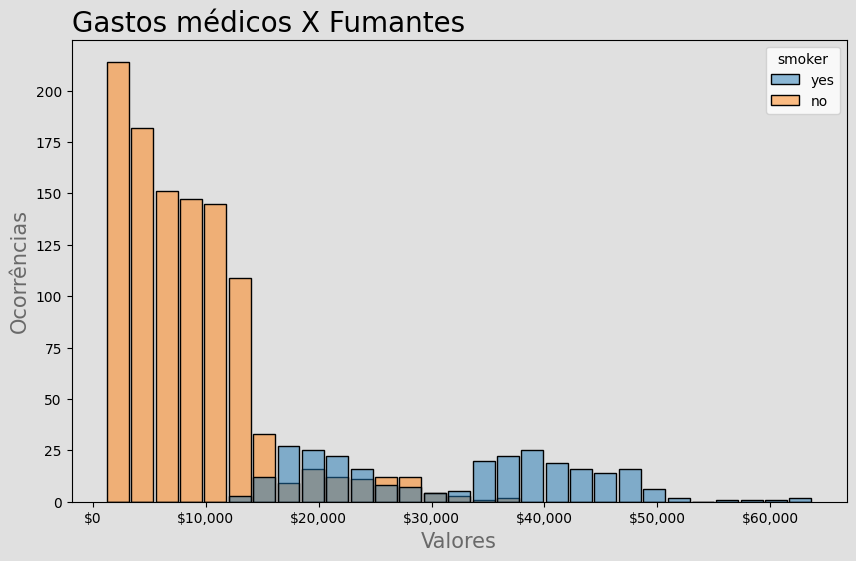

In [20]:
plt.figure(figsize=(10, 6))

sns.histplot(data=db, x="medical charges", shrink=.9, hue="smoker")

plt.title('Gastos médicos X Fumantes', fontsize=20, loc='left')
plt.xlabel('Valores', fontsize=15, color='#696969')
plt.ylabel('Ocorrências', fontsize=15, color='#696969')

plt.gca().set_facecolor('#E0E0E0')
plt.gcf().set_facecolor('#E0E0E0')

plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

plt.show()

## Gastos médicos X Idade

Os custos médicos acabam tornando-se elevados a medida que os pacientes ficam mais velhos.



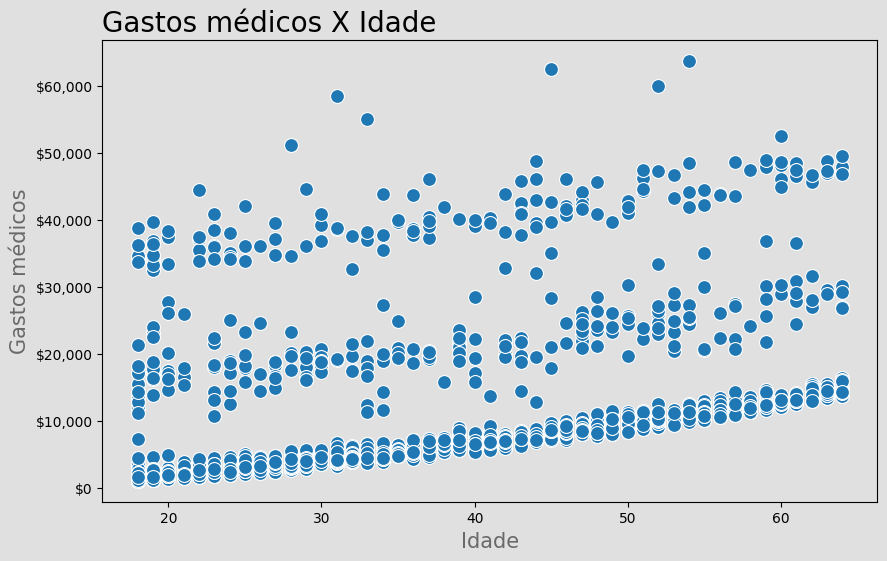

In [21]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=db, 
    x='age', 
    y='medical charges',
    s=100
)

plt.title('Gastos médicos X Idade', fontsize=20, loc='left')
plt.xlabel('Idade', fontsize=15, color='#696969')
plt.ylabel('Gastos médicos', fontsize=15, color='#696969')

plt.gca().set_facecolor('#E0E0E0')
plt.gcf().set_facecolor('#E0E0E0')

plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

plt.show()

## Gastos médicos X Idade X Fumantes

É notório que os pacientes fumantes tem mais gastos médicos, mesmo com a idade influenciando também nos gastos, porém de forma menos significativa que o tabagismo.

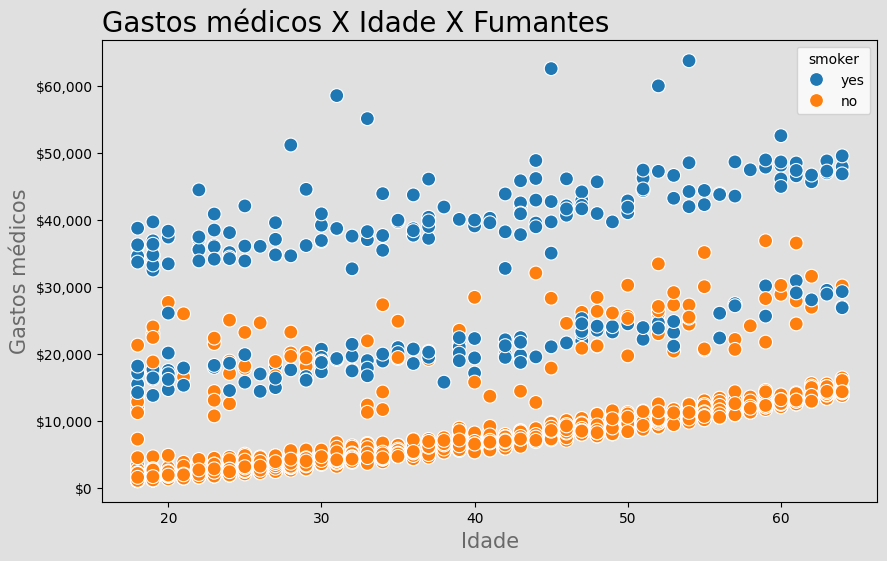

In [22]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=db, 
    x='age', 
    y='medical charges',
    hue='smoker',
    s=100
)

plt.title('Gastos médicos X Idade X Fumantes', fontsize=20, loc='left')
plt.xlabel('Idade', fontsize=15, color='#696969')
plt.ylabel('Gastos médicos', fontsize=15, color='#696969')

plt.gca().set_facecolor('#E0E0E0')
plt.gcf().set_facecolor('#E0E0E0')

plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

plt.show()

## Gastos médicos X BMI X Fumantes

Da mesma forma que o anterior, os valores para fumantes são mais altos, mesmo que o IMC (BMI) do indivíduo seja considerado fora da faixa de uma pessoa saudável.

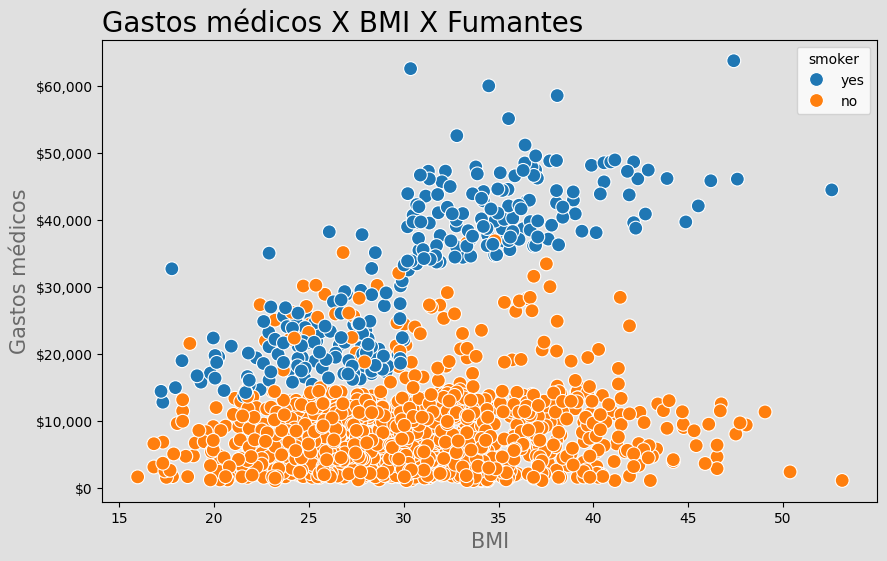

In [23]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=db, 
    y='medical charges', 
    x='bmi', 
    hue='smoker',
    s=100
)

plt.title('Gastos médicos X BMI X Fumantes', fontsize=20, loc='left')
plt.xlabel('BMI', fontsize=15, color='#696969')
plt.ylabel('Gastos médicos', fontsize=15, color='#696969')

plt.gca().set_facecolor('#E0E0E0')
plt.gcf().set_facecolor('#E0E0E0')

plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

plt.show()

# Conclusão

No geral, os dados indicam que o tabagismo é um fator crítico associado a altos gastos médicos, junto com a idade que também tem certa notoriedade, embora menos siginificativa. A variação no IMC (BMI), o número de filhos, sexo e região têm impactos menores nos custos médicos com os dados apresentados.
